## Applying Decision Tree Algorithm

#### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### Loading Dataset

In [2]:
df = pd.read_csv("C:\\Users\\Sapna\\Downloads\\crop_dataset.csv")
df.head()

,Soil type,temperature,humidity,ph,rainfall,label
0,Alluvial,20.879744,82.002744,6.502985,202.935536,rice
1,Alluvial,21.770462,80.319644,7.038096,226.655537,rice
2,Alluvial,23.004459,82.320763,7.840207,263.964248,rice
3,Alluvial,26.491096,80.158363,6.980401,242.864034,rice
4,Alluvial,20.130175,81.604873,7.628473,262.717340,rice


#### Performing EDA

In [3]:
df.shape

(3100, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Soil type    3100 non-null   object 
 1   temperature  3100 non-null   float64
 2   humidity     3100 non-null   float64
 3   ph           3100 non-null   float64
 4   rainfall     3100 non-null   float64
 5   label        3100 non-null   object 
dtypes: float64(4), object(2)
memory usage: 121.2+ KB


In [5]:
df.describe()

,temperature,humidity,ph,rainfall
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031
std,7.566308,24.007713,0.809477,64.048562
min,8.825675,10.034048,3.504752,20.211267
25%,22.810495,55.244920,5.895343,64.909095
50%,26.102848,68.980529,6.342518,97.057093
75%,29.365644,84.446524,6.841616,141.210784
max,54.986760,99.981876,9.935091,397.315380


In [6]:
df.corr()

,temperature,humidity,ph,rainfall
temperature,1.000000,-0.076999,0.017024,-0.055143
humidity,-0.076999,1.000000,-0.002359,0.192074
ph,0.017024,-0.002359,1.000000,-0.288598
rainfall,-0.055143,0.192074,-0.288598,1.000000


In [7]:
df.isnull().sum()

Soil type      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

#### Heat map

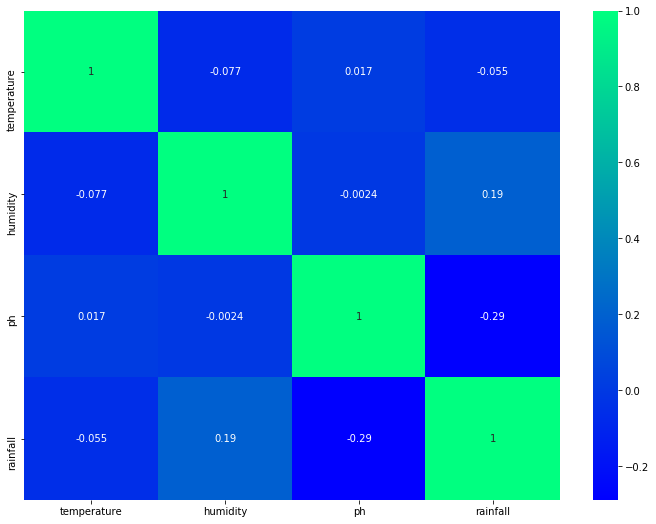

In [8]:
plt.figure(figsize = (12,9))
g = sns.heatmap(df.corr(),annot = True,cmap = 'winter')
g

#### To find co-relation between the features

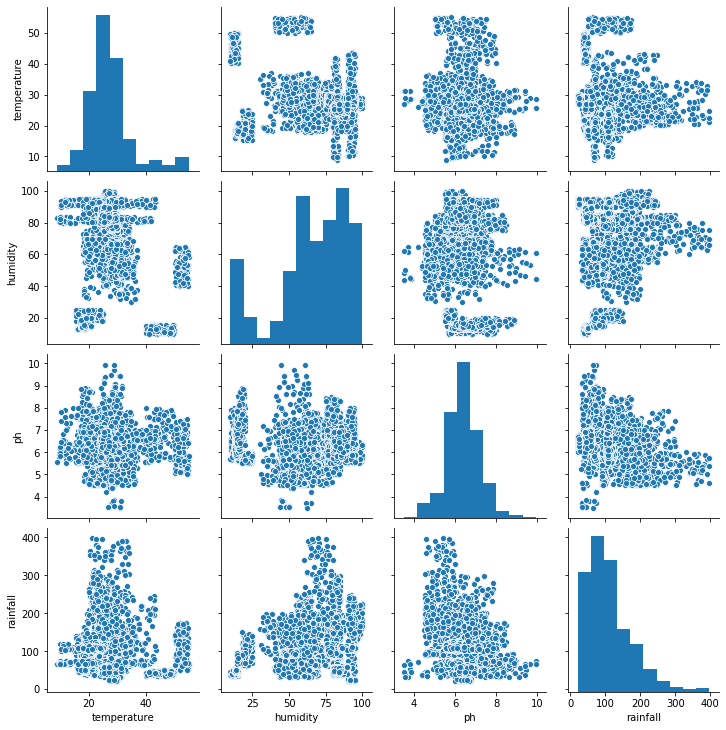

In [9]:
sns.pairplot(df)

In [10]:
# converting categorical data inti numerical data
df['Soil type'] = pd.get_dummies(df['Soil type'])
df.head()

,Soil type,temperature,humidity,ph,rainfall,label
0,1,20.879744,82.002744,6.502985,202.935536,rice
1,1,21.770462,80.319644,7.038096,226.655537,rice
2,1,23.004459,82.320763,7.840207,263.964248,rice
3,1,26.491096,80.158363,6.980401,242.864034,rice
4,1,20.130175,81.604873,7.628473,262.717340,rice


#### Dividing the Dataset

In [11]:
x = df.iloc[:,:-1].values

In [12]:
y = df.iloc[::,-1].values

#### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x[0:4]

array([[ 2.39871062, -0.82335105,  0.66645303,  0.16565468,  1.44792422],
       [ 2.39871062, -0.70561045,  0.59633508,  0.82681916,  1.81832798],
       [ 2.39871062, -0.54249304,  0.67970169,  1.81787913,  2.40092855],
       [ 2.39871062, -0.08160778,  0.58961609,  0.75553268,  2.07143454]])

#### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

#### Building the model

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
ypredict = model.predict(x_test)

#### Evaluating the model

In [16]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,ypredict)


0.9406451612903226

#### Applying Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
ypredict = model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
acc = accuracy_score(y_test,ypredict)
acc

0.9509677419354838

#### Applying KNN Algorithm

#### Performing Hyperparameter Tuning

In [19]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,31))
weight_options = ["uniform","distance"]
metric_options = ["euclidean","manhattan"]
param_grid = dict(n_neighbors = k_range,weights = weight_options,metric = metric_options)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [21]:
grid = GridSearchCV(knn,param_grid,cv = 5,verbose = 1,n_jobs = -1)
grid.fit(x,y)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   19.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [22]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
0.8593548387096774
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


#### Buliding the model

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
ypredict = knn.predict(x_test)

#### Evaluating Model

In [24]:
from sklearn.metrics import accuracy_score
acc  = accuracy_score(y_test,ypredict)
acc

0.864516129032258

## Applying SVM 

In [25]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)
ypredict = classifier.predict(x_test)

In [26]:
accuracy_score(y_test,ypredict)

0.8516129032258064

## Gradient Boosting

#### Building the model

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.927741935483871

## Applying Logistic Regression

#### Builing the model

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
ypredict = model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypredict)

0.6309677419354839